In [39]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
import torch
from torch import nn
from scipy.optimize import curve_fit

# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.signal import butter, cheby1, filtfilt
 

In [81]:
def Smoothen(data):
    freq_range = data.shape[0]
    # print(freq_range)
    fs = freq_range
    Wn = 10
    btype = 'lowpass'
    order = 3
    b, a = butter(order, Wn, btype, fs = fs)
    data_lowpass = filtfilt(b, a, data)
    return data_lowpass

In [102]:
# 12(te0_in), 13(te2_in), 14(te2_out), 15(te0_out)
def ProcessData(device):
    plt.figure()
    te0_in_te0_out_filename = device + '_12_in_15_out.dat' # this is reference efficienÍcy
    te2_in_te2_out_filename = device + '_13_in_14_out.dat' # this is what we're interested
    te0_in_te2_out_filename = device + '_12_in_14_out.dat' # in theory zero, since te0_in cannot couple into te2_out
    te2_in_te0_out_filename = device + '_13_in_15_out.dat' # in thory zero, since te2 residule in the upper wg gets tapered out

    te0_in_te0_out = np.loadtxt(te0_in_te0_out_filename) # reference efficiency
    wavelen = te0_in_te0_out[:,0]
    transmission = te0_in_te0_out[:, 1]
    plt.plot(wavelen, transmission, color='green', linewidth=0.5, alpha=0.7)

    te2_in_te2_out = np.loadtxt(te2_in_te2_out_filename) # what we're interested
    wavelen = te2_in_te2_out[:,0]
    transmission = te2_in_te2_out[:, 1]
    plt.plot(wavelen, transmission,  color='orange', linewidth=0.5, alpha=0.7)

    te0_in_te2_out = np.loadtxt(te0_in_te2_out_filename) # in theory zero
    wavelen = te0_in_te2_out[:,0]
    transmission = te0_in_te2_out[:, 1]
    plt.plot(wavelen, transmission, color='red', linewidth=0.5, alpha=0.7)
    transmission_smooth1 = Smoothen(transmission)
    plt.plot(wavelen, transmission_smooth1, color='red')

    te2_in_te0_out = np.loadtxt(te2_in_te0_out_filename) # in theory zero
    wavelen = te2_in_te0_out[:,0]
    transmission = te2_in_te0_out[:, 1]
    plt.plot(wavelen, transmission, color='blue', linewidth=0.5, alpha=0.7)
    transmission_smooth2 = Smoothen(transmission)
    plt.plot(wavelen, transmission_smooth2, color='blue')

    plt.legend(['te0_in_te0_out', 'te2_in_te2_out', 'te0_in_te2_out',  'te0_in_te2_out_smooth', 'te2_in_te0_out', 'te2_in_te0_out_smooth'])
    plt.xlabel('Wavelen (nm)')
    plt.ylabel('Transmission (a.u.)')
    plt.title('Device ' + device + ' transmission')
    # plt.xlim(1530, 1540)

    return transmission_smooth1, transmission_smooth2

'''
Note that te0_in_te0_out and te2_in_te2_out should be what we are interested in and used to compute mode conversion efficiency.
and te0_in_te2_out and te2_in_te0_out should be in theory close to zero.

However, it appears that in all (except for 1F) devices' .dat file, the two groups get reversed 
--- te0_in_te2_out and te2_in_te0_out appear to look like what we are intersted in, and
    te0_in_te0_out and te2_in_te2_out are close to zero instead

Is it due to the naming issue?

If it is the naming issue, from the six plots, device 3F appear to have the highest conversion efficiency: >90%
'''

"\nNote that te0_in_te0_out and te2_in_te2_out should be what we are interested in and used to compute mode conversion efficiency.\nand te0_in_te2_out and te2_in_te0_out should be in theory close to zero.\n\nHowever, it appears that in all (except for 1F) devices' .dat file, the two groups get reversed \n--- te0_in_te2_out and te2_in_te0_out appear to look like what we are intersted in, and\n    te0_in_te0_out and te2_in_te2_out are close to zero instead\n\nIs it due to the naming issue?\n\nIf it is the naming issue, from the six plots, device 3F appear to have the highest conversion efficiency: >90%\n"

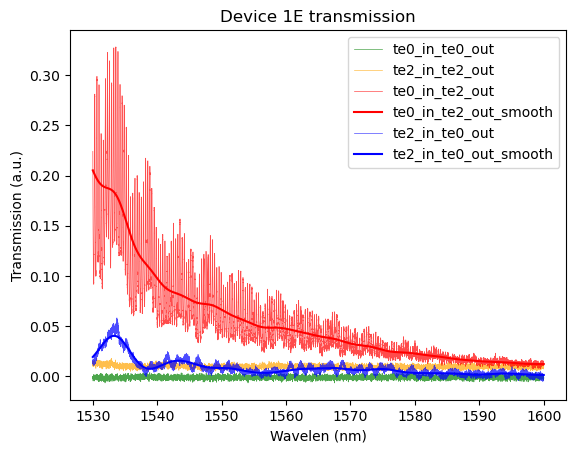

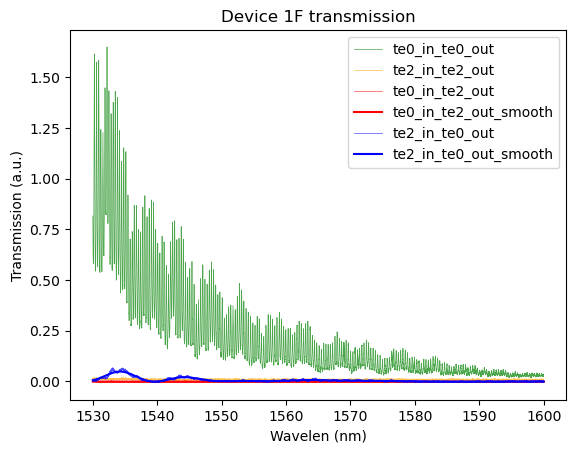

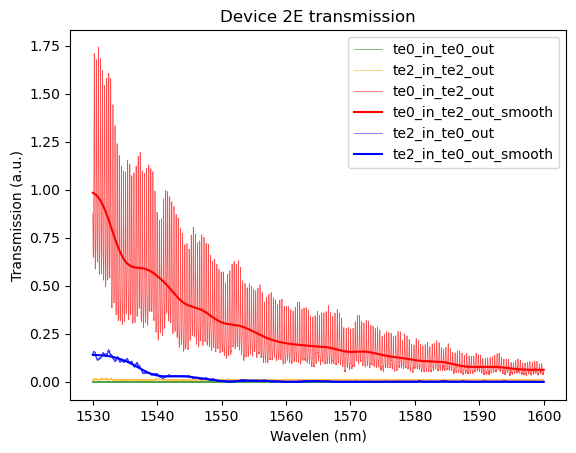

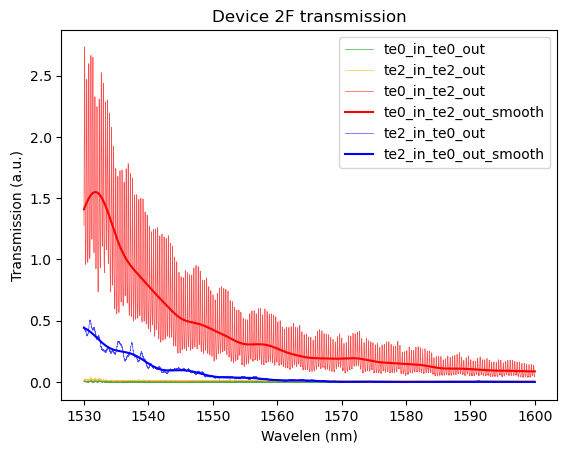

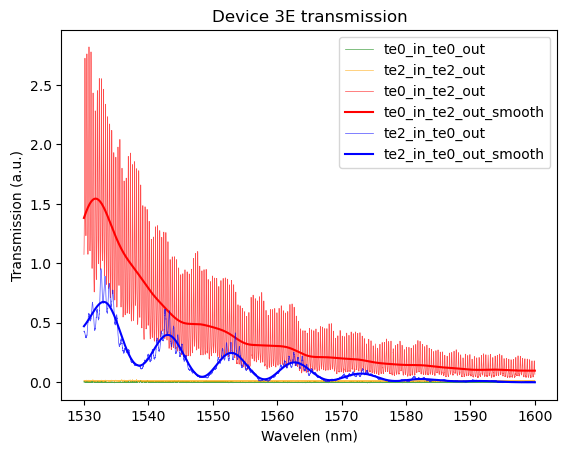

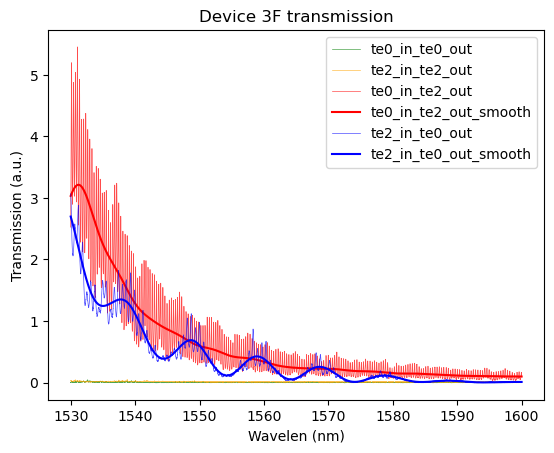

In [103]:
transmission1, transmission2 = ProcessData('1E')
transmission1, transmission2 = ProcessData('1F')
transmission1, transmission2 = ProcessData('2E')
transmission1, transmission2 = ProcessData('2F')
transmission1, transmission2 = ProcessData('3E')
transmission1, transmission2 = ProcessData('3F')